In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import namedtuple, deque
from adouble_qdn import Agent
import torch

In [2]:
id=2
name = {0 :'CartPole-v0',
        1 :'MountainCar-v0',
        2 : 'LunarLander-v2',
        3 : 'BipedalWalkerHardcore-v2'}

env = gym.make(name[id])
env.seed(0)
print('env :', name[id])
print('observation space:', env.observation_space)
print('action space:', env.action_space)

env : LunarLander-v2
observation space: Box(8,)
action space: Discrete(4)


In [3]:
nS = env.observation_space.shape[0]
nA = env.action_space.n

In [4]:
agent = Agent(state_size=nS, action_size=nA , seed=0, gamma=1, alpha= 1e-3, batch_size = 64, update_every = 2)

# watch an untrained agent
state = env.reset()
for j in range(300):
    action = agent.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break
env.close()

In [57]:
env.close()

In [355]:
def dqn(n_episodes=300, max_t=700, eps_start=.01, eps_end=1e-2, eps_decay=0.955, disp = False):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    best_avg = -np.inf
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            
            if disp : env.render()
            action = agent.act(np.array(state), eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        #if
        avg_score = np.mean(scores_window)
        print('\rEpisode {}\tAverage Score: {:.2f}\t Eps:{:.2e}'.format(i_episode, np.mean(scores_window),eps), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if avg_score > best_avg:
            best_avg = avg_score
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint' + name[id] + '.pth')    
            if avg_score >= 280.0:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
                torch.save(agent.qnetwork_local.state_dict(), 'checkpoint' + name[id] + '.pth')
                break
    if disp: env.close()
    return scores

scores = dqn()


Episode 1	Average Score: 291.95	 Eps:1.00e-02
Environment solved in -99 episodes!	Average Score: 291.95


NameError: name 'scores' is not defined

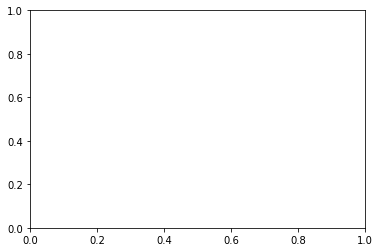

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [5]:
env = gym.make(name[id])
agent.qnetwork_local.load_state_dict(torch.load('checkpoint' + name[id] + '.pth'))
for _ in range(10):
    score =0
    state = env.reset()
    for t in range(1100):
        action = agent.act(np.array(state))
        env.render( )
        state, reward, done, _ = env.step(action)
        score+= reward
        if done:
            print('Score:{:.2f}'.format(score))
            break 

env.close()

Score:287.21
Score:279.08
Score:355.03
Score:240.47
Score:-30.26
Score:320.11
Score:-36.81
Score:421.20
Score:439.90
Score:272.44


In [6]:
import random

In [77]:
states, actions, rewards, next_states, dones = agent.memory.sample()

In [80]:
random.sample(agent.memory.memory,3)

[Experience(state=array([ 1.3331909e-01, -3.2547617e-03, -5.8290777e-03,  2.8844911e-04,
        -1.6939851e-02,  9.9401595e-04,  1.0000000e+00,  1.0000000e+00],
       dtype=float32), action=1, reward=-0.24031455052063386, next_state=array([ 1.3323899e-01, -3.2457851e-03, -8.0786813e-03,  3.9960162e-04,
        -1.6870951e-02,  1.3776945e-03,  1.0000000e+00,  1.0000000e+00],
       dtype=float32), done=False),
 Experience(state=array([ 0.08197842,  0.25303698,  0.19786128, -0.2756791 ,  0.07646795,
        -0.02235673,  0.        ,  0.        ], dtype=float32), action=0, reward=-1.5045000910144068, next_state=array([ 0.08394575,  0.24623288,  0.19786128, -0.30234587,  0.07535012,
        -0.02235673,  0.        ,  0.        ], dtype=float32), done=False),
 Experience(state=array([ 0.05179653,  1.2381641 ,  0.2146841 , -0.6287456 , -0.01796661,
         0.07018626,  0.        ,  0.        ], dtype=float32), action=0, reward=-0.7140649688896588, next_state=array([ 0.05397863,  1.2234163

In [341]:
weights =  deque(maxlen = 10)
[weights.append(i) for i in range(1,25,1)]
print('p:',np.array(weights)/sum(weights))
v = []
for _ in range (10000):
    v.append(random.choices(np.arange(1,11,1),weights=weights,k=4))
    
[v.count([i])/len(v) for i in np.unique(v)]

p: [0.07692308 0.08205128 0.08717949 0.09230769 0.0974359  0.1025641
 0.10769231 0.11282051 0.11794872 0.12307692]


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [347]:
weights[0] = 100

In [348]:
weights

deque([100, 16, 17, 18, 19, 20, 21, 22, 23, 24])

In [340]:
random.choices(np.arange(10),weights=weights,k=4)

[8, 0, 8, 7]

In [338]:
weights

deque([15, 16, 17, 18, 19, 20, 21, 22, 23, 24])